## {COVID-19 Case} Surveillance Public Use Data with Geography and {Air Quality Index (AQI) }

In [1]:
#importing libraries 
import pandas as pd
import numpy as np

### Checking the Dataframe

In [2]:
#Reading the COVID dataset, Also after reading the file and seeing its properties, I observed that the data set is quite large, which may have been the reason for the longer-than-usual time it took to read the particular files

covid_df = pd.read_csv('/Users/vishesh/Downloads/DA/cases.csv')

/var/folders/nr/x5htffh97tvfw1rt32pzkmc00000gn/T/ipykernel_1377/4244949551.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df = pd.read_csv('/Users/vishesh/Downloads/DA/cases.csv')


In [3]:
# checking all the columns name and understading the column data
covid_df.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [4]:
# Top 5 Rows of Covid_Dataframe
covid_df.head()

case_month res_state  state_fips_code res_county  county_fips_code  \
0    2020-12        AR              5.0      BOONE            5009.0   
1    2021-10        MO             29.0     PHELPS           29161.0   
2    2020-10        MO             29.0       CASS           29037.0   
3    2021-08        TN             47.0  CLAIBORNE           47025.0   
4    2020-11        GA             13.0  EFFINGHAM           13103.0   

      age_group     sex     race ethnicity  case_positive_specimen_interval  \
0  0 - 17 years     NaN      NaN       NaN                              0.0   
1  0 - 17 years     NaN      NaN       NaN                              0.0   
2  0 - 17 years  Female      NaN       NaN                              0.0   
3  0 - 17 years  Female  Missing   Missing                              0.0   
4  0 - 17 years  Female  Unknown   Missing                              NaN   

   case_onset_interval  process exposure_yn             current_status  \
0                  NaN  Missing     Missing  Laboratory-confirmed case   
1                  NaN  Missing     Missing  Laboratory-confirmed case   
2                  0.0  Missing     Missing  Laboratory-confirmed case   
3                  NaN  Missing     Missing  Laboratory-confirmed case   
4                  0.0  Missing     Missing  Laboratory-confirmed case   

  symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
0    Symptomatic  Missing  Missing      NaN                      NaN  
1        Missing  Unknown  Missing  Unknown                      NaN  
2    Symptomatic  Unknown  Missing  Unknown                      NaN  
3        Missing  Missing  Missing  Missing                      NaN  
4    Symptomatic  Missing  Missing  Missing                      NaN

## { Data Cleaning and Wrangling } 

In [5]:
# Summary of the Covid DataFrame, including the number of non-null values in each column, the data types of each column, and the amount of memory used by the DataFrame.

covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37532072 entries, 0 to 37532071
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

In [6]:
## Check for missing values in each column of the covid_df DataFrame and return the sum of missing values for each column.
covid_df.isna().sum()

case_month                               12
res_state                               920
state_fips_code                         920
res_county                          2561284
county_fips_code                    2561284
age_group                            406634
sex                                 1244276
race                                6597416
ethnicity                           7837672
case_positive_specimen_interval    25113195
case_onset_interval                20221411
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                            1752914
underlying_conditions_yn           35206303
dtype: int64

## Dealing with All the Missing Values now 

In [7]:
covid_df.iloc[1300:1320]

case_month res_state  state_fips_code      res_county  county_fips_code  \
1300    2020-05        MD             24.0        CAROLINE           24011.0   
1301    2021-08        AL              1.0         HOUSTON           13153.0   
1302    2021-03        NE             31.0         DOUGLAS           20045.0   
1303    2020-06        VA             51.0        BUCHANAN           51027.0   
1304    2020-10        KY             21.0         LINCOLN           21137.0   
1305    2020-12        MI             26.0           HURON           26063.0   
1306    2020-06        UT             49.0         SANPETE           49039.0   
1307    2021-10        OK             40.0         BECKHAM           40009.0   
1308    2021-03        CO              8.0      BROOMFIELD            8014.0   
1309    2021-08        AR              5.0      CRITTENDEN            5035.0   
1310    2021-03        WI             55.0         DOUGLAS           55031.0   
1311    2021-09        MO             29.0         DUNKLIN           29069.0   
1312    2021-07        ID             16.0          ELMORE           16039.0   
1313    2020-12        OH             39.0         FAYETTE           39047.0   
1314    2021-10        KS             20.0      MONTGOMERY           20125.0   
1315    2021-02        VA             51.0        NEW KENT           51127.0   
1316    2020-12        PA             42.0  NORTHUMBERLAND           42097.0   
1317    2021-09        MT             30.0      SILVER BOW           30093.0   
1318    2021-08        NY             36.0    ST. LAWRENCE           36089.0   
1319    2020-09        OH             39.0        AUGLAIZE           39011.0   

           age_group     sex     race            ethnicity  \
1300  18 to 49 years    Male    White      Hispanic/Latino   
1301         Missing    Male    White  Non-Hispanic/Latino   
1302  18 to 49 years    Male    White  Non-Hispanic/Latino   
1303             NaN     NaN      NaN                  NaN   
1304    0 - 17 years     NaN      NaN                  NaN   
1305  18 to 49 years     NaN      NaN                  NaN   
1306  18 to 49 years     NaN      NaN                  NaN   
1307    0 - 17 years  Female      NaN                  NaN   
1308    0 - 17 years  Female  Missing                  NaN   
1309    0 - 17 years  Female      NaN                  NaN   
1310    0 - 17 years  Female      NaN                  NaN   
1311    0 - 17 years  Female      NaN                  NaN   
1312    0 - 17 years  Female      NaN                  NaN   
1313    0 - 17 years  Female      NaN                  NaN   
1314    0 - 17 years  Female      NaN                  NaN   
1315    0 - 17 years  Female      NaN                  NaN   
1316    0 - 17 years  Female      NaN                  NaN   
1317    0 - 17 years  Female  Missing              Missing   
1318    0 - 17 years  Female      NaN                  NaN   
1319  18 to 49 years  Female      NaN                  NaN   

      case_positive_specimen_interval  case_onset_interval  \
1300                              NaN                  NaN   
1301                              NaN                  NaN   
1302                              0.0                  0.0   
1303                              NaN                  0.0   
1304                              0.0                  0.0   
1305                              NaN                  NaN   
1306                              1.0                  0.0   
1307                              NaN                  NaN   
1308                              NaN                  NaN   
1309                              NaN                  NaN   
1310                              NaN                  0.0   
1311                              0.0                  NaN   
1312                              0.0                  NaN   
1313                              0.0                  0.0   
1314                              NaN                  0.0   
1315                         

<b> After Analyzing the above cell: I observed that there are a large number of missing values in columns {Sex}, {Age_Group}. I also recognized that simply dropping these rows with missing values would result in a biased and inaccurate dataset. Instead, I will be using a different approach, which is utilizing the backward fill method to fill in the missing values in the 'SEX' column. This approach is chosen because it uses the previous value to fill the missing values because there is a pattern of missing values in the Sex and Age_group columns, thus it will be more accurate and will not make the dataset biased. By doing this I am trying to improve the results of their analysis by ensuring that the 'SEX' column has a complete and accurate set of data. </b>

In [8]:
# filling the missing values with Backword fill aproach
covid_df['sex'].fillna(method='bfill', inplace=True)

In [9]:
# checking weather the records are filled or not 
covid_df.iloc[1300:1320]

case_month res_state  state_fips_code      res_county  county_fips_code  \
1300    2020-05        MD             24.0        CAROLINE           24011.0   
1301    2021-08        AL              1.0         HOUSTON           13153.0   
1302    2021-03        NE             31.0         DOUGLAS           20045.0   
1303    2020-06        VA             51.0        BUCHANAN           51027.0   
1304    2020-10        KY             21.0         LINCOLN           21137.0   
1305    2020-12        MI             26.0           HURON           26063.0   
1306    2020-06        UT             49.0         SANPETE           49039.0   
1307    2021-10        OK             40.0         BECKHAM           40009.0   
1308    2021-03        CO              8.0      BROOMFIELD            8014.0   
1309    2021-08        AR              5.0      CRITTENDEN            5035.0   
1310    2021-03        WI             55.0         DOUGLAS           55031.0   
1311    2021-09        MO             29.0         DUNKLIN           29069.0   
1312    2021-07        ID             16.0          ELMORE           16039.0   
1313    2020-12        OH             39.0         FAYETTE           39047.0   
1314    2021-10        KS             20.0      MONTGOMERY           20125.0   
1315    2021-02        VA             51.0        NEW KENT           51127.0   
1316    2020-12        PA             42.0  NORTHUMBERLAND           42097.0   
1317    2021-09        MT             30.0      SILVER BOW           30093.0   
1318    2021-08        NY             36.0    ST. LAWRENCE           36089.0   
1319    2020-09        OH             39.0        AUGLAIZE           39011.0   

           age_group     sex     race            ethnicity  \
1300  18 to 49 years    Male    White      Hispanic/Latino   
1301         Missing    Male    White  Non-Hispanic/Latino   
1302  18 to 49 years    Male    White  Non-Hispanic/Latino   
1303             NaN  Female      NaN                  NaN   
1304    0 - 17 years  Female      NaN                  NaN   
1305  18 to 49 years  Female      NaN                  NaN   
1306  18 to 49 years  Female      NaN                  NaN   
1307    0 - 17 years  Female      NaN                  NaN   
1308    0 - 17 years  Female  Missing                  NaN   
1309    0 - 17 years  Female      NaN                  NaN   
1310    0 - 17 years  Female      NaN                  NaN   
1311    0 - 17 years  Female      NaN                  NaN   
1312    0 - 17 years  Female      NaN                  NaN   
1313    0 - 17 years  Female      NaN                  NaN   
1314    0 - 17 years  Female      NaN                  NaN   
1315    0 - 17 years  Female      NaN                  NaN   
1316    0 - 17 years  Female      NaN                  NaN   
1317    0 - 17 years  Female  Missing              Missing   
1318    0 - 17 years  Female      NaN                  NaN   
1319  18 to 49 years  Female      NaN                  NaN   

      case_positive_specimen_interval  case_onset_interval  \
1300                              NaN                  NaN   
1301                              NaN                  NaN   
1302                              0.0                  0.0   
1303                              NaN                  0.0   
1304                              0.0                  0.0   
1305                              NaN                  NaN   
1306                              1.0                  0.0   
1307                              NaN                  NaN   
1308                              NaN                  NaN   
1309                              NaN                  NaN   
1310                              NaN                  0.0   
1311                              0.0                  NaN   
1312                              0.0                  NaN   
1313                              0.0                  0.0   
1314                              NaN                  0.0   
1315                         

In [10]:
# filling the missing values with Backword fill aproach
covid_df['age_group'].fillna(method='bfill', inplace=True)

In [11]:
covid_df.iloc[1300:1320]

case_month res_state  state_fips_code      res_county  county_fips_code  \
1300    2020-05        MD             24.0        CAROLINE           24011.0   
1301    2021-08        AL              1.0         HOUSTON           13153.0   
1302    2021-03        NE             31.0         DOUGLAS           20045.0   
1303    2020-06        VA             51.0        BUCHANAN           51027.0   
1304    2020-10        KY             21.0         LINCOLN           21137.0   
1305    2020-12        MI             26.0           HURON           26063.0   
1306    2020-06        UT             49.0         SANPETE           49039.0   
1307    2021-10        OK             40.0         BECKHAM           40009.0   
1308    2021-03        CO              8.0      BROOMFIELD            8014.0   
1309    2021-08        AR              5.0      CRITTENDEN            5035.0   
1310    2021-03        WI             55.0         DOUGLAS           55031.0   
1311    2021-09        MO             29.0         DUNKLIN           29069.0   
1312    2021-07        ID             16.0          ELMORE           16039.0   
1313    2020-12        OH             39.0         FAYETTE           39047.0   
1314    2021-10        KS             20.0      MONTGOMERY           20125.0   
1315    2021-02        VA             51.0        NEW KENT           51127.0   
1316    2020-12        PA             42.0  NORTHUMBERLAND           42097.0   
1317    2021-09        MT             30.0      SILVER BOW           30093.0   
1318    2021-08        NY             36.0    ST. LAWRENCE           36089.0   
1319    2020-09        OH             39.0        AUGLAIZE           39011.0   

           age_group     sex     race            ethnicity  \
1300  18 to 49 years    Male    White      Hispanic/Latino   
1301         Missing    Male    White  Non-Hispanic/Latino   
1302  18 to 49 years    Male    White  Non-Hispanic/Latino   
1303    0 - 17 years  Female      NaN                  NaN   
1304    0 - 17 years  Female      NaN                  NaN   
1305  18 to 49 years  Female      NaN                  NaN   
1306  18 to 49 years  Female      NaN                  NaN   
1307    0 - 17 years  Female      NaN                  NaN   
1308    0 - 17 years  Female  Missing                  NaN   
1309    0 - 17 years  Female      NaN                  NaN   
1310    0 - 17 years  Female      NaN                  NaN   
1311    0 - 17 years  Female      NaN                  NaN   
1312    0 - 17 years  Female      NaN                  NaN   
1313    0 - 17 years  Female      NaN                  NaN   
1314    0 - 17 years  Female      NaN                  NaN   
1315    0 - 17 years  Female      NaN                  NaN   
1316    0 - 17 years  Female      NaN                  NaN   
1317    0 - 17 years  Female  Missing              Missing   
1318    0 - 17 years  Female      NaN                  NaN   
1319  18 to 49 years  Female      NaN                  NaN   

      case_positive_specimen_interval  case_onset_interval  \
1300                              NaN                  NaN   
1301                              NaN                  NaN   
1302                              0.0                  0.0   
1303                              NaN                  0.0   
1304                              0.0                  0.0   
1305                              NaN                  NaN   
1306                              1.0                  0.0   
1307                              NaN                  NaN   
1308                              NaN                  NaN   
1309                              NaN                  NaN   
1310                              NaN                  0.0   
1311                              0.0                  NaN   
1312                              0.0                  NaN   
1313                              0.0                  0.0   
1314                              NaN                  0.0   
1315                         

<b> After analyzing a random sample of rows and checking the 'Race',  'Ethnicity', 'Underling_Conditions_yn', and 'death_yn' columns of the DataFrame, it was determined that there were no patterns of missing values in those columns. Dropping rows with missing values in these columns would result in a biased and inaccurate analysis. As the dataframe does not have information about the race and ethnicity of the missing values, I choose an alternative approach to fill the missing values with the word 'Unknown'. This approach will provide better results as it will not compromise the integrity of the data and will not result in a biased analysis. This way I can have a more accurate understanding of the data and the missing values will not affect the analysis results. </b>

In [12]:
# filling the missing values with "Unknown" word
covid_df['race'].fillna(value = 'Unknown', inplace = True)

In [13]:
# checking weather the records are filled or not 
covid_df['race']

0           Unknown
1           Unknown
2           Unknown
3           Missing
4           Unknown
             ...   
37532067      White
37532068      White
37532069      White
37532070      White
37532071      White
Name: race, Length: 37532072, dtype: object

In [14]:
# filling the missing values with "Unknown" word
covid_df['ethnicity'].fillna(value = 'Unknown', inplace = True)

In [15]:
# checking weather the records are filled or not 
covid_df['ethnicity'].head(50)

0                 Unknown
1                 Unknown
2                 Unknown
3                 Missing
4                 Missing
5                 Unknown
6                 Unknown
7                 Missing
8                 Missing
9                 Missing
10                Missing
11                Missing
12                Missing
13                Unknown
14                Unknown
15                Unknown
16                Unknown
17                Unknown
18                Missing
19                Missing
20                Missing
21                Unknown
22                Unknown
23                Unknown
24                Unknown
25                Missing
26                Unknown
27                Missing
28                Unknown
29                Unknown
30        Hispanic/Latino
31        Hispanic/Latino
32        Hispanic/Latino
33        Hispanic/Latino
34        Hispanic/Latino
35        Hispanic/Latino
36        Hispanic/Latino
37        Hispanic/Latino
38        Hi

In [16]:
covid_df['underlying_conditions_yn'].fillna(value = 'Unknown', inplace = True)

In [17]:
covid_df['underlying_conditions_yn'].head(50)

0     Unknown
1     Unknown
2     Unknown
3     Unknown
4     Unknown
5     Unknown
6     Unknown
7     Unknown
8     Unknown
9     Unknown
10    Unknown
11    Unknown
12    Unknown
13    Unknown
14    Unknown
15    Unknown
16    Unknown
17    Unknown
18    Unknown
19    Unknown
20    Unknown
21    Unknown
22    Unknown
23    Unknown
24    Unknown
25    Unknown
26    Unknown
27    Unknown
28    Unknown
29    Unknown
30    Unknown
31    Unknown
32    Unknown
33    Unknown
34    Unknown
35    Unknown
36    Unknown
37    Unknown
38    Unknown
39    Unknown
40    Unknown
41    Unknown
42    Unknown
43    Unknown
44    Unknown
45    Unknown
46    Unknown
47    Unknown
48        Yes
49    Unknown
Name: underlying_conditions_yn, dtype: object

In [18]:
covid_df['death_yn'].fillna(value = 'Unknown', inplace = True)

In [19]:
covid_df['death_yn'].head(50)

0     Unknown
1     Unknown
2     Unknown
3     Missing
4     Missing
5          No
6          No
7          No
8     Missing
9     Missing
10    Missing
11    Missing
12    Missing
13    Unknown
14    Unknown
15    Unknown
16    Missing
17    Unknown
18    Missing
19    Missing
20    Missing
21    Unknown
22    Unknown
23    Unknown
24         No
25    Missing
26         No
27    Missing
28    Unknown
29    Unknown
30    Missing
31    Missing
32    Missing
33         No
34    Missing
35    Unknown
36    Missing
37    Missing
38    Unknown
39         No
40         No
41    Unknown
42         No
43         No
44         No
45         No
46         No
47         No
48    Unknown
49    Missing
Name: death_yn, dtype: object

<b> After analyzing the 'case_positive_specimen_interval','case_onset_interval' columns of the DataFrame and observing that it has a relatively numerical values. I recognized that dropping the rows with missing values in this column will significantly impact the overall dataset. Therefore, I decided to take the mean of the whole column. This approach is chosen because the number of missing values in this column is large and randomly generated, so mean will surely affect the overall analysis.</b>

In [20]:
# Using imputation techniques to fill the missing values with mean of the column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fitting the imputer on the data
imputer.fit(covid_df[['case_positive_specimen_interval','case_onset_interval']])

# replacing missing values with the mean value
covid_df[['case_positive_specimen_interval','case_onset_interval']] = imputer.transform(covid_df[['case_positive_specimen_interval','case_onset_interval']])


In [21]:
# checking both case_positive_specimen_interval and case_onset_interval records, whether they are filled or not
covid_df[['case_positive_specimen_interval','case_onset_interval']].head(50)

case_positive_specimen_interval  case_onset_interval
0                          0.000000             0.099948
1                          0.000000             0.099948
2                          0.000000             0.000000
3                          0.000000             0.099948
4                          0.200811             0.000000
5                          0.200811             0.000000
6                          0.200811             0.099948
7                          0.000000             0.099948
8                          0.200811             0.000000
9                          0.200811             0.099948
10                         0.200811             0.099948
11                         0.200811             0.099948
12                         0.200811             0.000000
13                         0.000000             0.000000
14                         0.200811             0.000000
15                         0.200811             0.000000
16                         0.200811             0.000000
17                         0.200811             0.099948
18                         0.000000             0.099948
19                         0.200811             0.099948
20                         0.200811             0.000000
21                         0.200811             0.099948
22                         0.200811             0.099948
23                         0.000000             0.000000
24                         0.200811             0.000000
25                         0.200811             0.000000
26                         0.200811             0.099948
27                         0.200811             0.099948
28                         0.000000             0.099948
29                         0.200811             0.000000
30                         0.200811             0.099948
31                         0.200811             0.099948
32                         0.200811             0.099948
33                         0.200811             0.099948
34                         0.200811             0.099948
35                         0.200811             0.099948
36                         0.200811             0.099948
37                         0.200811             0.000000
38                         0.200811             0.099948
39                         0.200811             0.000000
40                         0.000000             0.099948
41                         0.200811             0.099948
42                         0.200811             0.099948
43                         0.000000             0.099948
44                         0.200811             0.099948
45                         0.200811             0.000000
46                         0.200811             0.000000
47                         0.000000             0.000000
48                         0.000000             0.000000
49                         0.200811             0.000000

<b> After analyzing the 'res_state' column of the DataFrame and observing that it has a relatively low number of missing values compared to other columns. I recognized that dropping the rows with missing values in this column will not significantly impact the overall dataset. Therefore, I decided to drop the rows with missing values in the 'res_state' column in order to maintain the integrity and accuracy of the overall dataset. This approach is chosen because the number of missing values in this column is not large enough to affect the overall analysis and by dropping the missing values the data will be more accurate.</b>

In [22]:
# Dropping the Column 'res_county' and 'County_fips_code' based on the missing values and also it will not be useful in further analysis
covid_df.dropna(subset = ['res_state', 'county_fips_code'], inplace = True)

In [23]:
covid_df.isna().sum()

case_month                         0
res_state                          0
state_fips_code                    0
res_county                         0
county_fips_code                   0
age_group                          0
sex                                0
race                               0
ethnicity                          0
case_positive_specimen_interval    0
case_onset_interval                0
process                            0
exposure_yn                        0
current_status                     0
symptom_status                     0
hosp_yn                            0
icu_yn                             0
death_yn                           0
underlying_conditions_yn           0
dtype: int64

### All the missing values are done with  processing now !!

-------------------

## <u>Dealing with Relevant Columns now</u>

In [24]:
covid_df.head()

case_month res_state  state_fips_code res_county  county_fips_code  \
0    2020-12        AR              5.0      BOONE            5009.0   
1    2021-10        MO             29.0     PHELPS           29161.0   
2    2020-10        MO             29.0       CASS           29037.0   
3    2021-08        TN             47.0  CLAIBORNE           47025.0   
4    2020-11        GA             13.0  EFFINGHAM           13103.0   

      age_group     sex     race ethnicity  case_positive_specimen_interval  \
0  0 - 17 years  Female  Unknown   Unknown                         0.000000   
1  0 - 17 years  Female  Unknown   Unknown                         0.000000   
2  0 - 17 years  Female  Unknown   Unknown                         0.000000   
3  0 - 17 years  Female  Missing   Missing                         0.000000   
4  0 - 17 years  Female  Unknown   Missing                         0.200811   

   case_onset_interval  process exposure_yn             current_status  \
0             0.099948  Missing     Missing  Laboratory-confirmed case   
1             0.099948  Missing     Missing  Laboratory-confirmed case   
2             0.000000  Missing     Missing  Laboratory-confirmed case   
3             0.099948  Missing     Missing  Laboratory-confirmed case   
4             0.000000  Missing     Missing  Laboratory-confirmed case   

  symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
0    Symptomatic  Missing  Missing  Unknown                  Unknown  
1        Missing  Unknown  Missing  Unknown                  Unknown  
2    Symptomatic  Unknown  Missing  Unknown                  Unknown  
3        Missing  Missing  Missing  Missing                  Unknown  
4    Symptomatic  Missing  Missing  Missing                  Unknown

In [25]:
# Checking the datatype of columns
covid_df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [26]:
## Changing the datatype of column state_fips_code from float to 'Int'.
covid_df['state_fips_code'] = covid_df['state_fips_code'].astype(int)

<b> I am renaming the 'state_fips_code' column of the current dataset to 'State Code'. The reason for this is that I  noticed that there is a similar column with the same name in the dataset they were working on in task 1, which is the AQI dataset. By renaming the column, I am trying to make it easy to merge both the datasets on this column. This will enable them to join the data from both datasets and analyze it together. </b>

In [27]:
# Renaming the column from state_fips_code' to 'State Code'
covid_df = covid_df.rename(columns = {'state_fips_code':'State Code'})

### Taking relevant columns for further Analysis and dropping the rest of the uncessary columns for this Task-2

In [28]:
# Dropping Columns from dataframe

covid_df = covid_df.drop(columns = ['res_state', 'res_county', 'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status'])

In [29]:
#Checking the dataframe
covid_df.head()

case_month  State Code  hosp_yn   icu_yn death_yn underlying_conditions_yn
0    2020-12           5  Missing  Missing  Unknown                  Unknown
1    2021-10          29  Unknown  Missing  Unknown                  Unknown
2    2020-10          29  Unknown  Missing  Unknown                  Unknown
3    2021-08          47  Missing  Missing  Missing                  Unknown
4    2020-11          13  Missing  Missing  Missing                  Unknown

In [30]:
# Checking the dtypes
covid_df.dtypes

case_month                  object
State Code                   int64
hosp_yn                     object
icu_yn                      object
death_yn                    object
underlying_conditions_yn    object
dtype: object

In [31]:
# Checking the size of dataframe
covid_df.shape

(34970788, 6)

In [32]:
# converting the 'case_month' column of covid DataFrame into datetime datatype.
covid_df['case_month'] = pd.to_datetime(covid_df['case_month'])
covid_df['case_month'].head()

0   2020-12-01
1   2021-10-01
2   2020-10-01
3   2021-08-01
4   2020-11-01
Name: case_month, dtype: datetime64[ns]

In [33]:
## Changing the datatype of column state_fips_code from float to 'Int'.
covid_df['State Code'] = covid_df['State Code'].astype(int)

In [34]:
covid_df.dtypes

case_month                  datetime64[ns]
State Code                           int64
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [35]:
# filtering data for further analysis based on AQI_Datasets of year 2020 and 2021
filtered_df = covid_df[covid_df['case_month'].dt.year.isin([2020, 2021])]

In [36]:
filtered_df.shape

(34970788, 6)

<b> I identified that in order to calculate correlation and other factors related to the data I am working on. However, I realized that using the categorical values of the data will not be possible. So, I have decided to use an approach of converting the categorical values to numerical values. This will enable me to calculate factors such as hospital rate, death_yn, and underlying conditions based on the numerical values. This approach was chosen because numerical values can be used for mathematical calculations, making it possible to calculate correlation rates and other factors. Additionally, having numerical values instead of categorical values will make it easier to perform good analysis.</b>

In [37]:
# Converting the hosp_yn column categorical values to numerical 
filtered_df['hosp_yn'].replace({'Yes':1, 'No':0, 'Unknown':0, 'Missing':0}, inplace=True)

In [38]:
# Converting the death_yn column categorical values to numerical 
filtered_df['death_yn'].replace({'Yes':1, 'No':0, 'Unknown':0, 'Missing':0}, inplace=True)

In [39]:
# Converting the icu_yn column categorical values to numerical 
filtered_df['icu_yn'].replace({'Yes':1, 'No':0, 'Unknown':0, 'Missing':0}, inplace=True)

In [40]:
# Converting the underlying_conditions_yn column categorical values to numerical 
filtered_df['underlying_conditions_yn'].replace({'Yes':1, 'No':0, 'Unknown':0}, inplace=True)

In [41]:
# checking the size of covid dataframe
filtered_df.shape

(34970788, 6)

In [42]:
# Grouping the covid DataFrame by 'State_code' and 'case_month' columns and  calculating the sum of the remaining columns for the "YES" Responses:

df_covid = filtered_df.groupby(['State Code', 'case_month'],as_index=False).sum()

## The Dataframe looks good with relevant columns now

In [43]:
df_covid.head(25)

State Code case_month  hosp_yn  death_yn  underlying_conditions_yn
0            1 2020-03-01      405        11                        22
1            1 2020-04-01      673       164                        29
2            1 2020-05-01      671        74                        70
3            1 2020-06-01      943        82                       163
4            1 2020-07-01     1339       309                       126
5            1 2020-08-01     1079       179                       116
6            1 2020-09-01      700         0                        84
7            1 2020-10-01      744        24                       104
8            1 2020-11-01      673       234                       113
9            1 2020-12-01      985       855                       148
10           1 2021-01-01     1001       675                       147
11           1 2021-02-01      664        23                       100
12           1 2021-03-01      445         0                        76
13           1 2021-04-01      418         0                        83
14           1 2021-05-01      347         0                        58
15           1 2021-06-01      240         0                        45
16           1 2021-07-01      904       129                       180
17           1 2021-08-01     1996       555                       480
18           1 2021-09-01     1392       134                       337
19           1 2021-10-01      384         0                        98
20           2 2020-03-01       26         0                       114
21           2 2020-04-01       11         0                        65
22           2 2020-05-01       11         0                        77
23           2 2020-06-01       28         0                       246
24           2 2020-07-01       70         0                       402

# Highly Important Note below !!: 

# The AQI Concatenated dataset was imported and read separately to avoid kernel crashes due to the large size of the COVID dataset. This allows for more efficient processing and analysis of the data without running out of memory. Now, the AQI dataset is being called directly in this notebook to merge with the COVID dataset for further analysis.

In [44]:
## Reading the Concatenated AQI Dataset of the relevant years

AQI_df = pd.read_csv('/Users/vishesh/Downloads/AQI_Final1.csv')

In [45]:
AQI_df.head()

Unnamed: 0 State_Name year_month  State Code        AQI
0           0    Alabama    2020-01           1  29.538732
1           1    Alabama    2020-02           1  28.063433
2           2    Alabama    2020-03           1  37.696078
3           3    Alabama    2020-04           1  41.858209
4           4    Alabama    2020-05           1  40.176329

In [46]:
# Dropping the irrelevant columns
AQI_df = AQI_df.drop(columns=['Unnamed: 0'])

In [47]:
df_covid

State Code case_month  hosp_yn  death_yn  underlying_conditions_yn
0              1 2020-03-01      405        11                        22
1              1 2020-04-01      673       164                        29
2              1 2020-05-01      671        74                        70
3              1 2020-06-01      943        82                       163
4              1 2020-07-01     1339       309                       126
...          ...        ...      ...       ...                       ...
998           56 2021-06-01       66         0                       645
999           56 2021-07-01      104         0                       846
1000          56 2021-08-01      165         0                      2141
1001          56 2021-09-01      188         0                      2348
1002          56 2021-10-01      162         0                      2030

[1003 rows x 5 columns]

In [48]:
df_covid.dtypes

State Code                           int64
case_month                  datetime64[ns]
hosp_yn                              int64
death_yn                             int64
underlying_conditions_yn             int64
dtype: object

## By generating unique columns in both the covid and AQI dataframes, it allows for easy merging of the two datasets by creating a common identifier. This will prevent duplicate records and ensure accurate data analysis. The approach used here is to create a unique ID for each row in both datasets, making it possible to merge them with ease.

In [49]:
# Converting case_month to string format of '%Y-%m' which represents the year-month in a string format
df_covid['case_month'] = df_covid['case_month'].dt.strftime('%Y-%m')

In [50]:
# Generating Unique 'ID' Columns in covid dataframe
df_covid['ID'] = df_covid['State Code'].astype(str)+df_covid['case_month'].astype(str)

In [51]:
# Generating Unique 'ID' Columns in AQI dataframe
AQI_df['ID'] = (AQI_df['State Code'].astype(int)).astype(str)+AQI_df['year_month'].astype(str)

In [52]:
# Checking the ID Column in AQI DataFrame
AQI_df

State_Name year_month  State Code        AQI         ID
0       Alabama    2020-01           1  29.538732   12020-01
1       Alabama    2020-02           1  28.063433   12020-02
2       Alabama    2020-03           1  37.696078   12020-03
3       Alabama    2020-04           1  41.858209   12020-04
4       Alabama    2020-05           1  40.176329   12020-05
...         ...        ...         ...        ...        ...
1143    Wyoming    2021-06          56  45.946939  562021-06
1144    Wyoming    2021-07          56  59.803191  562021-07
1145    Wyoming    2021-08          56  63.000000  562021-08
1146    Wyoming    2021-09          56  41.371622  562021-09
1147    Wyoming    2021-10          56  12.250000  562021-10

[1148 rows x 5 columns]

In [53]:
# Checking the ID Column in Covid DataFrame
df_covid

State Code case_month  hosp_yn  death_yn  underlying_conditions_yn  \
0              1    2020-03      405        11                        22   
1              1    2020-04      673       164                        29   
2              1    2020-05      671        74                        70   
3              1    2020-06      943        82                       163   
4              1    2020-07     1339       309                       126   
...          ...        ...      ...       ...                       ...   
998           56    2021-06       66         0                       645   
999           56    2021-07      104         0                       846   
1000          56    2021-08      165         0                      2141   
1001          56    2021-09      188         0                      2348   
1002          56    2021-10      162         0                      2030   

             ID  
0      12020-03  
1      12020-04  
2      12020-05  
3      12020-06  
4      12020-07  
...         ...  
998   562021-06  
999   562021-07  
1000  562021-08  
1001  562021-09  
1002  562021-10  

[1003 rows x 6 columns]

## Performing Some Visualizations

## Visualizations over State vs Hospitalization

In [54]:
fg = AQI_df.groupby(['State_Name'],as_index=False)['AQI'].mean()

In [55]:
# Generating State_Name vs AQI charts

import plotly.express as px

fig = px.bar(fg, x='State_Name', y='AQI', title='Hospitalizations over time',
             color='AQI', color_continuous_scale='Viridis',
             labels={'State_Name':'State', 'AQI':'Hospitalizations'})
fig.update_layout(title={'x':0.5,'text':'Hospitalizations over State'},
                  xaxis_title='State', yaxis_title='Hospitalizations',
                  xaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5),
                  yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=0.5),
                  title_font=dict(size=24, family='Arial, sans-serif'),
                  paper_bgcolor='white')

fig.update_layout(
    yaxis=dict(
        tickformat=',d',
        showgrid=True, 
        gridcolor='lightgray', 
        gridwidth=0.5
    )
)



fig.show()


## Visualizations over State vs Death

In [56]:
rg = df_covid.groupby(['State Code'],as_index=False)['hosp_yn', 'death_yn'].mean()
import plotly.express as px

fig = px.line(rg, x='State Code', y='death_yn', title='State Code over Death')
fig.update_layout(title={'x':0.5,'text':'State Code over Death'},template='plotly_dark',xaxis_title='State Code', yaxis_title='Death',xaxis=dict(showgrid=False, gridcolor='lightgray', gridwidth=1), yaxis=dict(showgrid=False, gridcolor='lightgray', gridwidth=1),font=dict(family='Courier New, monospace', size=18, color='#7f7f7f'),legend=dict(x=0.1, y=1) )
fig.update_layout(
    yaxis=dict(
        tickformat='d'
    )
)

fig.update_layout(
    xaxis=dict(
        tickmode='linear'
    )
)

fig.show()

/var/folders/nr/x5htffh97tvfw1rt32pzkmc00000gn/T/ipykernel_1377/3166128952.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [57]:
AQI_df.dtypes

State_Name     object
year_month     object
State Code      int64
AQI           float64
ID             object
dtype: object

In [58]:
df_covid.dtypes

State Code                   int64
case_month                  object
hosp_yn                      int64
death_yn                     int64
underlying_conditions_yn     int64
ID                          object
dtype: object

## { Merging AQI Dataframe and Covid Dataframe }

In [59]:
# Merging AQI and Covid dataframe
merged_df2 = pd.merge(AQI_df, df_covid, on='ID') 

In [60]:
merged_df2.iloc[20:40]

State_Name year_month  State Code_x        AQI        ID  State Code_y  \
20     Alaska    2020-05             2  22.057416  22020-05             2   
21     Alaska    2020-06             2  16.250000  22020-06             2   
22     Alaska    2020-07             2  16.859459  22020-07             2   
23     Alaska    2020-08             2  15.285714  22020-08             2   
24     Alaska    2020-09             2  17.220339  22020-09             2   
25     Alaska    2020-10             2  25.626374  22020-10             2   
26     Alaska    2020-11             2  35.616667  22020-11             2   
27     Alaska    2020-12             2  32.054945  22020-12             2   
28     Alaska    2021-01             2  45.664516  22021-01             2   
29     Alaska    2021-02             2  35.892857  22021-02             2   
30     Alaska    2021-03             2  28.780645  22021-03             2   
31     Alaska    2021-04             2  29.298611  22021-04             2   
32     Alaska    2021-05             2  23.941935  22021-05             2   
33     Alaska    2021-06             2  20.729167  22021-06             2   
34     Alaska    2021-07             2  23.062500  22021-07             2   
35     Alaska    2021-08             2  23.612903  22021-08             2   
36     Alaska    2021-09             2  27.433333  22021-09             2   
37    Arizona    2020-01             4  38.815920  42020-01             4   
38    Arizona    2020-02             4  45.862069  42020-02             4   
39    Arizona    2020-03             4  44.865672  42020-03             4   

   case_month  hosp_yn  death_yn  underlying_conditions_yn  
20    2020-05       11         0                        77  
21    2020-06       28         0                       246  
22    2020-07       70         0                       402  
23    2020-08       80         0                       173  
24    2020-09       62         0                       239  
25    2020-10      169         0                       212  
26    2020-11      283         0                       314  
27    2020-12      196         0                       203  
28    2021-01       74         0                        81  
29    2021-02       55         0                        79  
30    2021-03       88         0                        86  
31    2021-04      115         0                        88  
32    2021-05       44         0                         5  
33    2021-06       35         0                         4  
34    2021-07      142         0                        12  
35    2021-08      286         0                        13  
36    2021-09      364         0                        11  
37    2020-01        0         0                         0  
38    2020-02       10         0                         0  
39    2020-03      769        73                        13

In [61]:
# Checking the null values
merged_df2.isnull().sum()

State_Name                  0
year_month                  0
State Code_x                0
AQI                         0
ID                          0
State Code_y                0
case_month                  0
hosp_yn                     0
death_yn                    0
underlying_conditions_yn    0
dtype: int64

In [62]:
# Taking the unique State codes
merged_df2['State Code_y'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [63]:
# Generating the list of Unique State Codes
sc = list([ 1,  2,  4,  5,  6,  8,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [64]:
## prevent warnings from cluttering the output
import warnings 
warnings.filterwarnings('ignore')

# Imoprting plotting libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

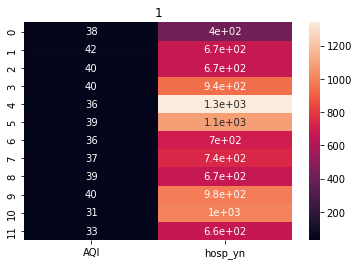

----------------------
----------------------


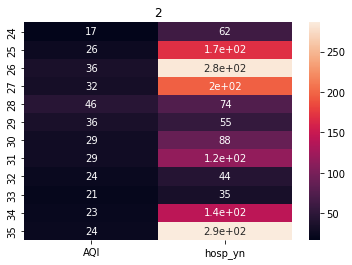

----------------------
----------------------


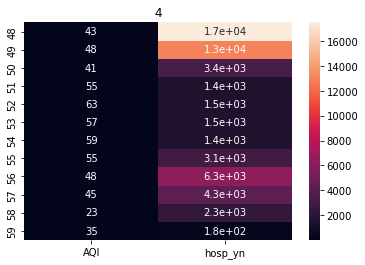

----------------------
----------------------


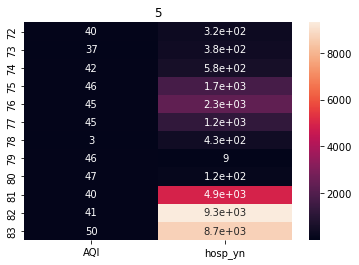

----------------------
----------------------


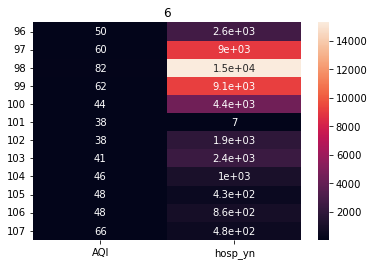

----------------------
----------------------


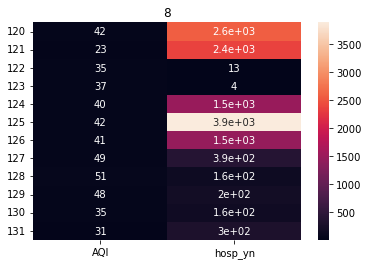

----------------------
----------------------


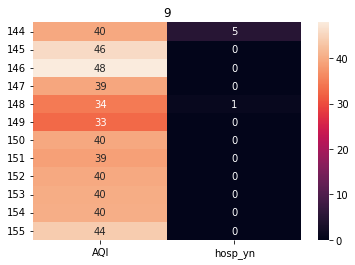

----------------------
----------------------


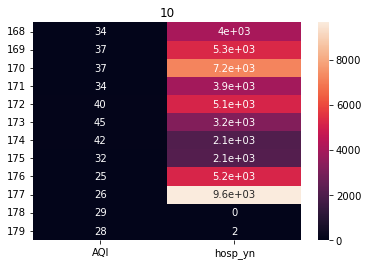

----------------------
----------------------


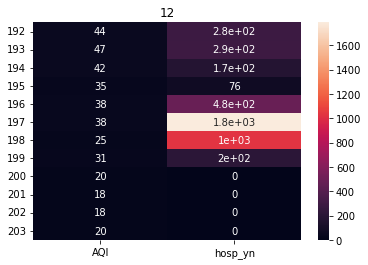

----------------------
----------------------


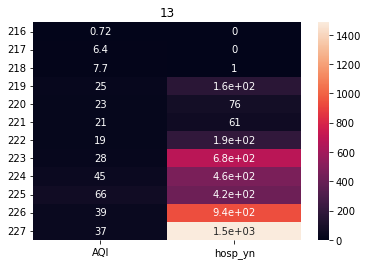

----------------------
----------------------


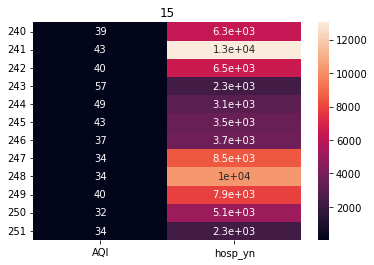

----------------------
----------------------


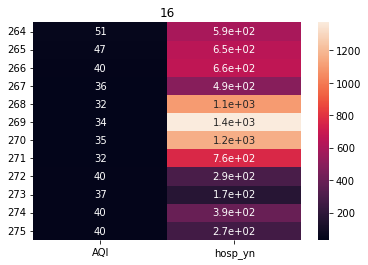

----------------------
----------------------


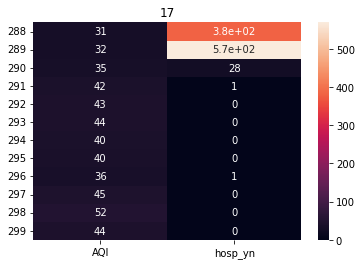

----------------------
----------------------


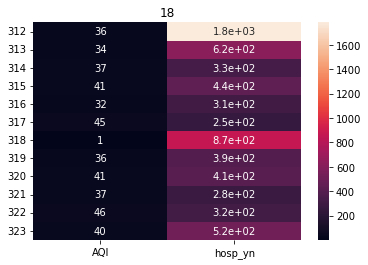

----------------------
----------------------


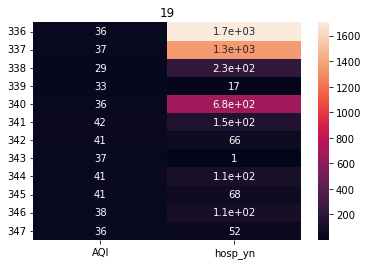

----------------------
----------------------


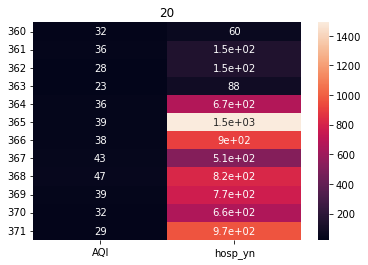

----------------------
----------------------


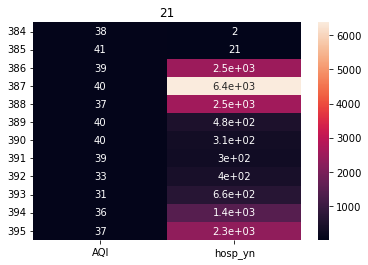

----------------------
----------------------


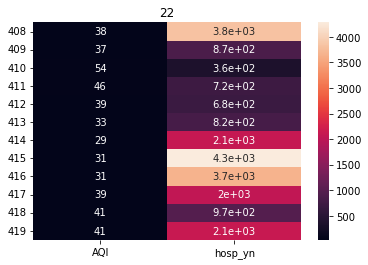

----------------------
----------------------


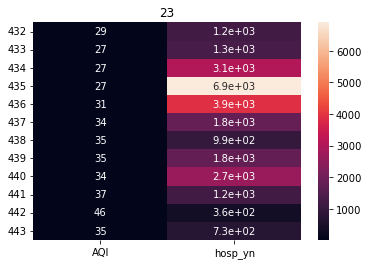

----------------------
----------------------


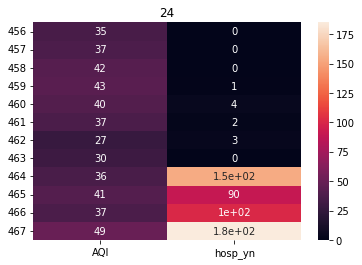

----------------------
----------------------


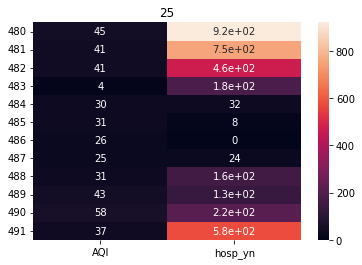

----------------------
----------------------


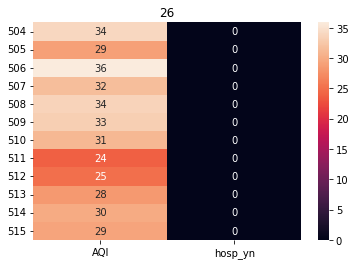

----------------------
----------------------


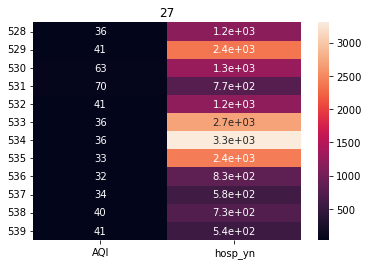

----------------------
----------------------


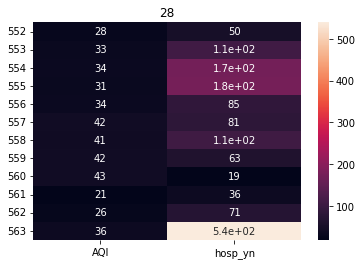

----------------------
----------------------


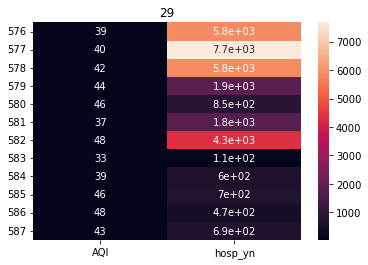

----------------------
----------------------


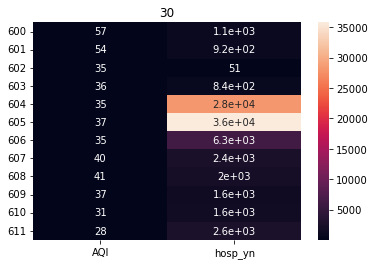

----------------------
----------------------


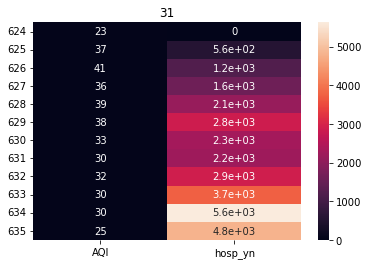

----------------------
----------------------


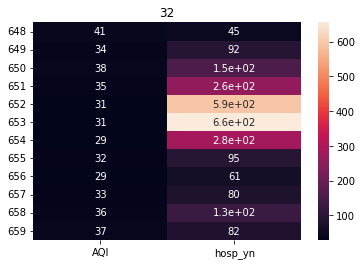

----------------------
----------------------


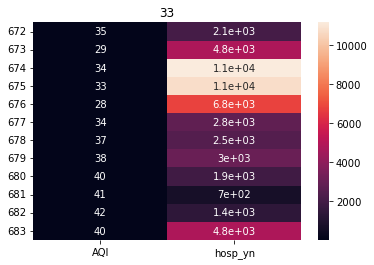

----------------------
----------------------


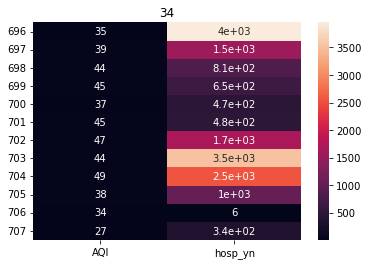

----------------------
----------------------


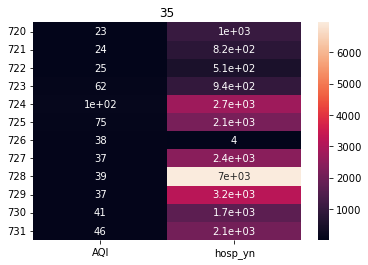

----------------------
----------------------


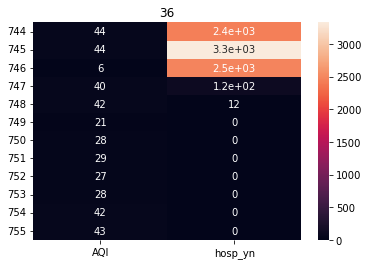

----------------------
----------------------


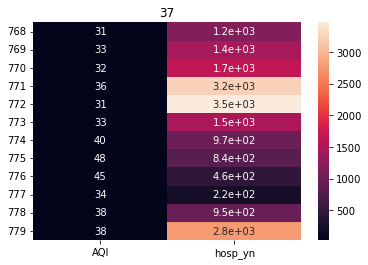

----------------------
----------------------


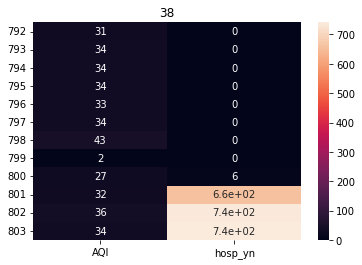

----------------------
----------------------


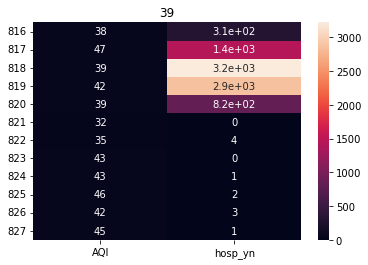

----------------------
----------------------


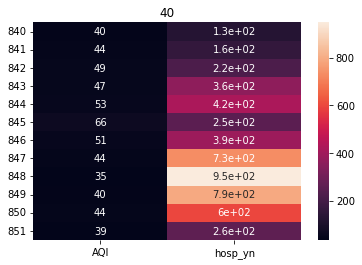

----------------------
----------------------


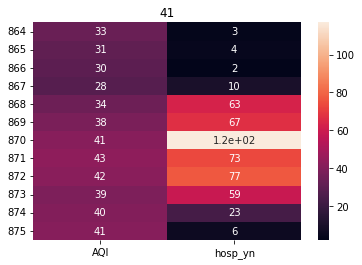

----------------------
----------------------


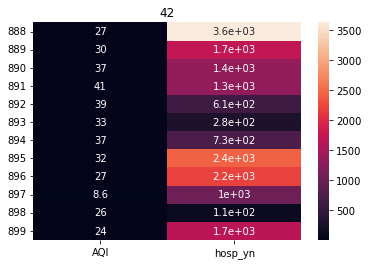

----------------------
----------------------


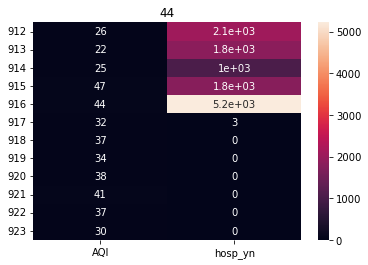

----------------------
----------------------


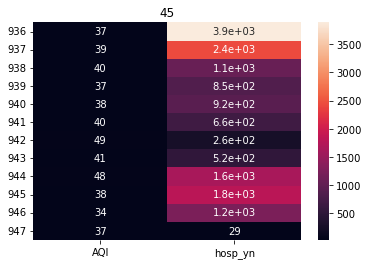

----------------------
----------------------


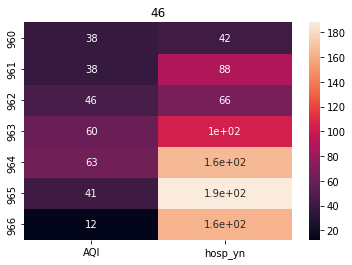

----------------------


In [65]:
##Generating Correlation of AQI and Hosp_yn

i=0
j=24
for code in sc:
  
  df_plotter = pd.DataFrame()
  df_plotter=merged_df2.iloc[i:j,:]
  df_plotter = df_plotter.drop(['State_Name','year_month','State Code_x','ID','State Code_y','case_month','death_yn','underlying_conditions_yn'], axis=1)
  df_plotter_2020=pd.DataFrame()
  df_plotter_2019=pd.DataFrame()
  df_plotter_2019=df_plotter.iloc[:12,]
  df_plotter_2020=df_plotter.iloc[12:,]

  if not df_plotter.empty:
      try:
          ax = plt.axes()
          sns.heatmap(df_plotter_2019, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
          p2 = sns.heatmap(df_plotter_2020, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
      except ValueError:
          print("Warning: zero-size array")


  i+=24
  j+=24


In [66]:
## For the above graphs Each graph has its own ""Title"" with State Code

##  ----------------------------------------------------------------------------------------------------------


## Is there a correlation between Air Quality Index (AQI) and COVID-19 hospitalization rate?

Ans: 

Yes there is a corrrelation between AQI and hosp_yn,

For State Code: {44, 41, 36, 25, 20, 21, 18, 8, 6, 5, 2} which represents State Name: {Rhode Island, Oregon, New York, Massachusetts, Kansas, Kentucky, Indiana, Colorado, California, } is directly correlated with AQI and Hospy_yn

For few States Code: {1, 5, 26, 27, 42, 39, 45, 48, 17, 19 } which represents State Name: {Alabama, Arkansas, Minesota, Michigan, Missouri, Montana, Nebraska, Ohio, Pennsylvania, South Carolina, Texas, Iova, Illinois } is not directly correleated with AQI. There could be several reasons why the correlation between AQI and hospitalization rate is not direct for certain states. 
Some possible explanations include:

1) Other factors, such as symptom_status, age distribution{Age_group}, and access to healthcare, may play a larger role in determining hospitalization rates in those states.

2) The data used in the analysis may not be comprehensive enough to accurately capture the relationship between AQI and hospitalization rate in those states.

3) There may be differences in how AQI is measured or reported in those states, leading to discrepancies in the data.



<u>For Reference: The Above Answer is Based on the heat plots of AQI vs Hosp_yn for each state code</u>|


# {Final Summary on Correlation}

<b>The analysis of the heatmap graph suggests that there is a correlation between AQI and COVID-19 hospitalization rate. The data shows that for certain state codes, the AQI is directly correlated with the hospitalization rate. However, for other states, the correlation is not as clear. The Heat graph displays a <u>total of 12 stacks, indicating that the data covers a 12 month period, or 8 months in the case of 8 stacks</u>. Overall, it can be inferred that AQI may play a role in the hospitalization rate of COVID-19 patients in some states.</b>


## -----------------------------------------------------------------------------------------------------------

## Analyzing other Co-founding Factors

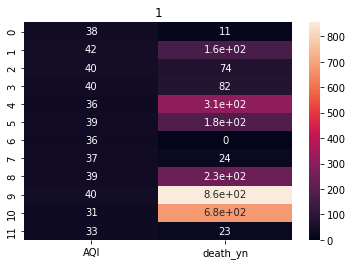

----------------------
----------------------


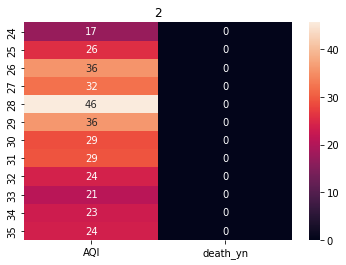

----------------------
----------------------


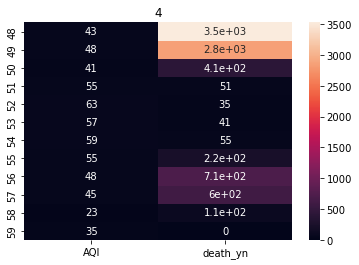

----------------------
----------------------


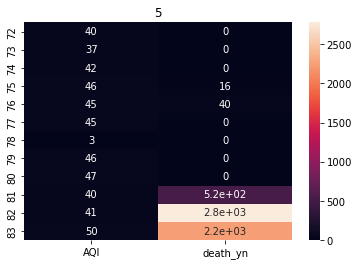

----------------------
----------------------


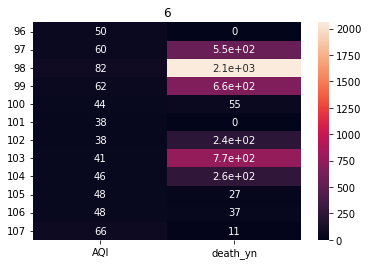

----------------------
----------------------


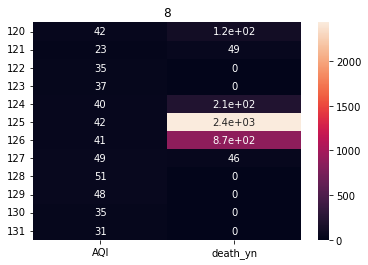

----------------------
----------------------


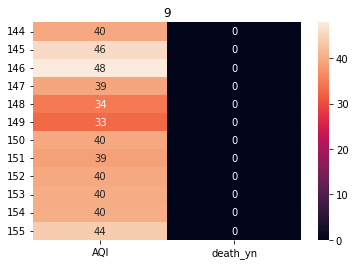

----------------------
----------------------


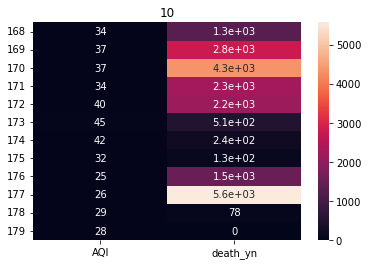

----------------------
----------------------


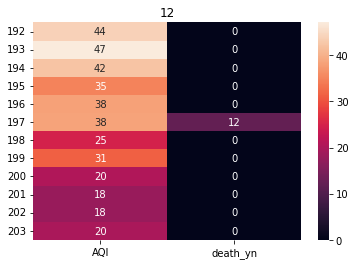

----------------------
----------------------


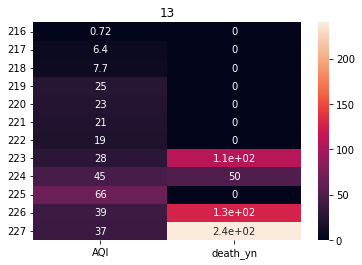

----------------------
----------------------


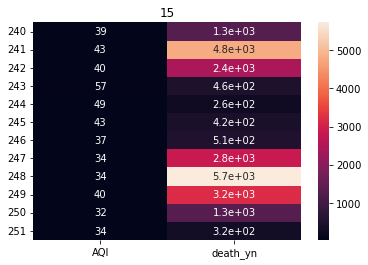

----------------------
----------------------


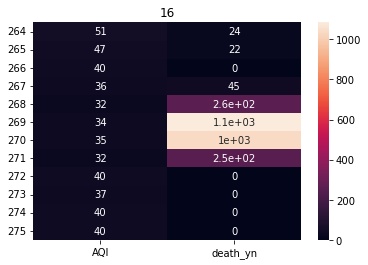

----------------------
----------------------


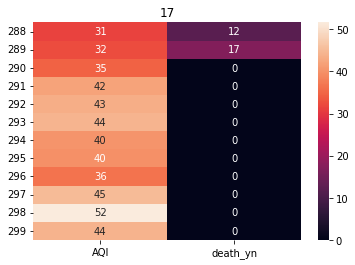

----------------------
----------------------


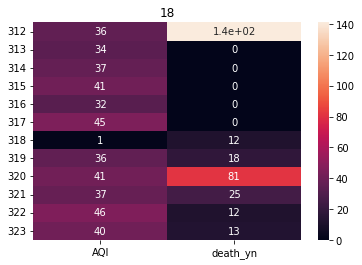

----------------------
----------------------


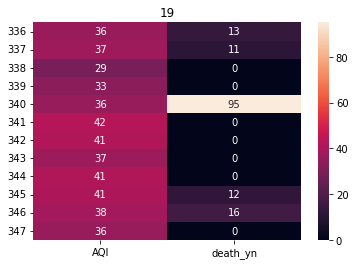

----------------------
----------------------


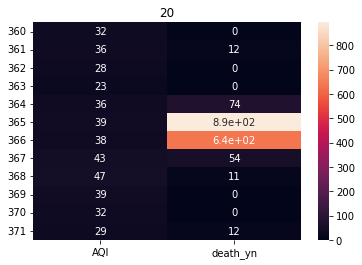

----------------------
----------------------


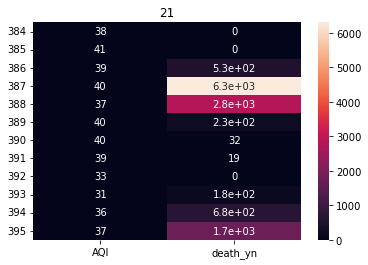

----------------------
----------------------


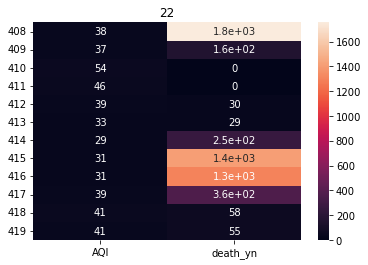

----------------------
----------------------


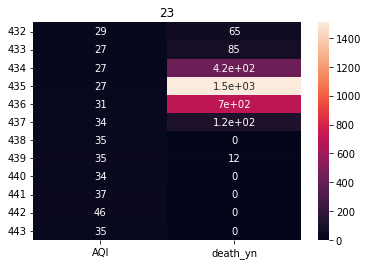

----------------------
----------------------


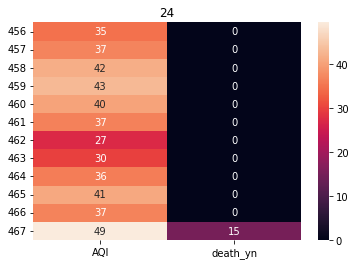

----------------------
----------------------


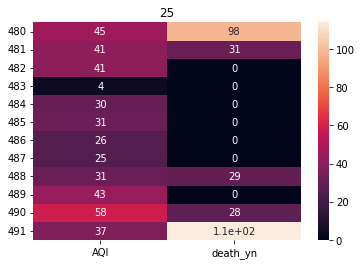

----------------------
----------------------


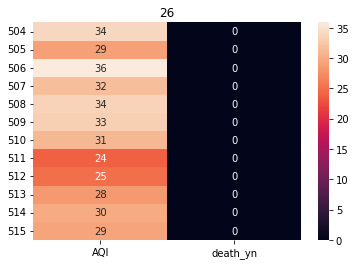

----------------------
----------------------


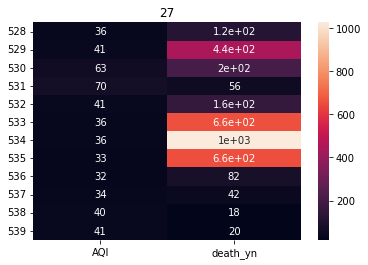

----------------------
----------------------


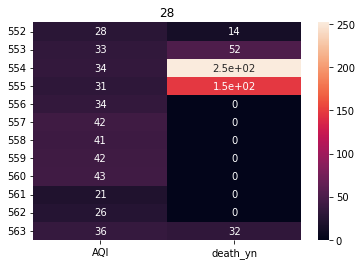

----------------------
----------------------


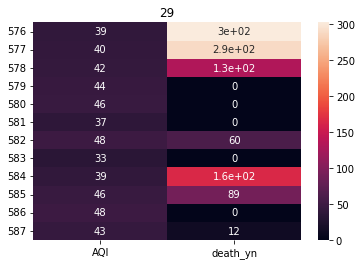

----------------------
----------------------


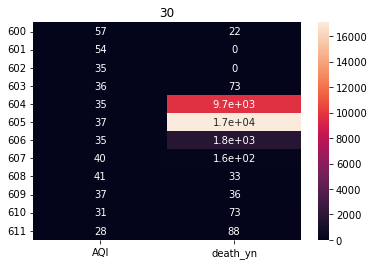

----------------------
----------------------


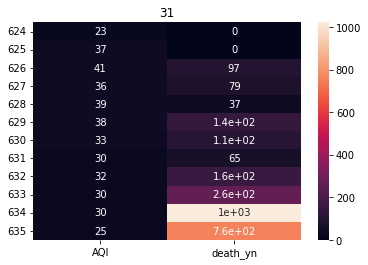

----------------------
----------------------


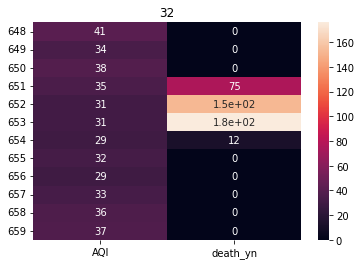

----------------------
----------------------


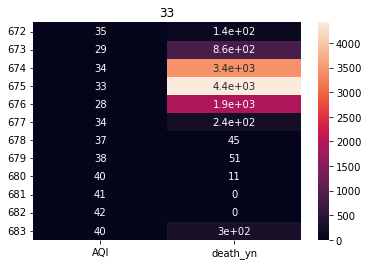

----------------------
----------------------


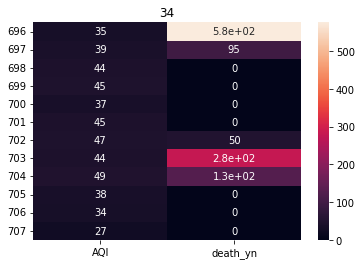

----------------------
----------------------


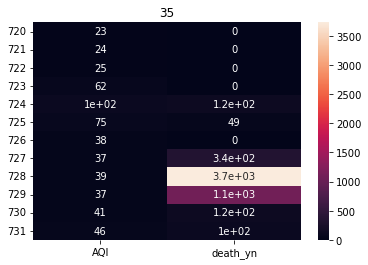

----------------------
----------------------


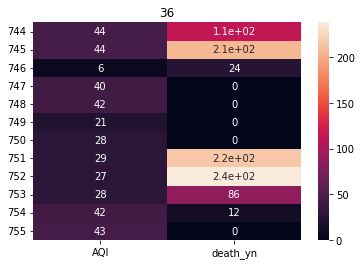

----------------------
----------------------


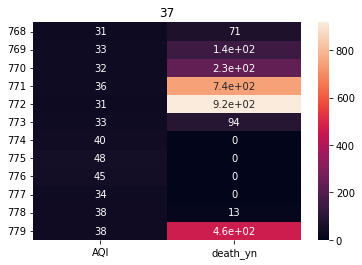

----------------------
----------------------


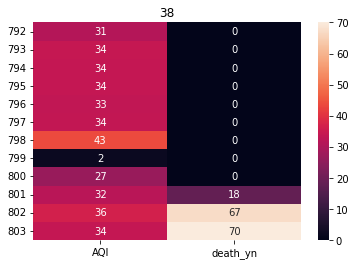

----------------------
----------------------


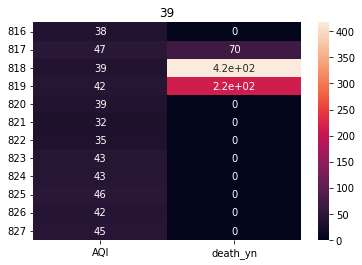

----------------------
----------------------


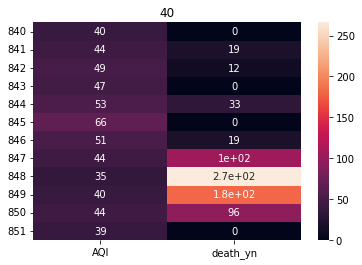

----------------------
----------------------


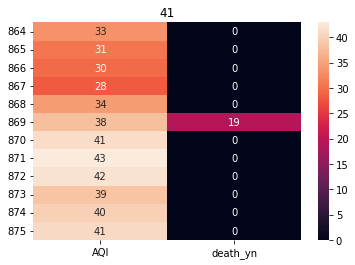

----------------------
----------------------


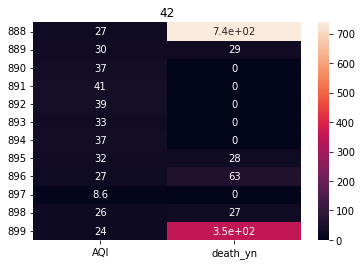

----------------------
----------------------


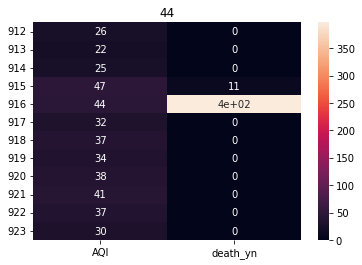

----------------------
----------------------


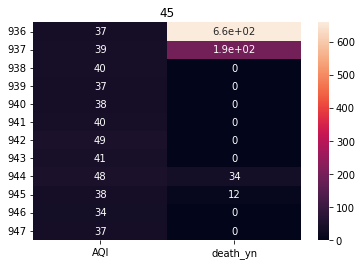

----------------------
----------------------


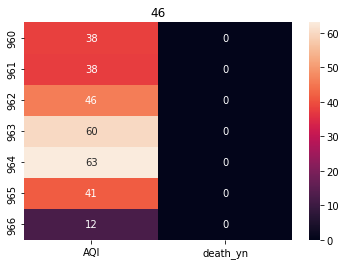

----------------------


In [67]:
##Generating Correlation Heat Map AQI and Death_yn

i=0
j=24
for code in sc:
  
  df_plotter = pd.DataFrame()
  df_plotter=merged_df2.iloc[i:j,:]
  df_plotter = df_plotter.drop(['State_Name','year_month','State Code_x','ID','State Code_y','case_month','hosp_yn','underlying_conditions_yn'], axis=1)
  df_plotter_2020=pd.DataFrame()
  df_plotter_2019=pd.DataFrame()
  df_plotter_2019=df_plotter.iloc[:12,]
  df_plotter_2020=df_plotter.iloc[12:,]

  if not df_plotter.empty:
      try:
          ax = plt.axes()
          sns.heatmap(df_plotter_2019, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
          p2 = sns.heatmap(df_plotter_2020, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
      except ValueError:
          print("Warning: zero-size array")


  i+=24
  j+=24


### After Analysing the death conditions of the Dataframe: death_yn states that the the patient die as a result of this illness,  which is specified in terms of [Yes; No; Unknown; Missing] .



### Based on the Above heat maps, the AQI has no correlation with the death_yn Heatmaps as many States of them has 0 death rates between the AQI . 

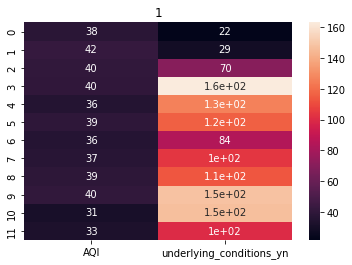

----------------------
----------------------


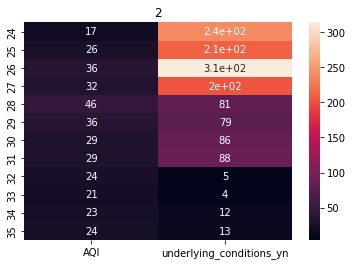

----------------------
----------------------


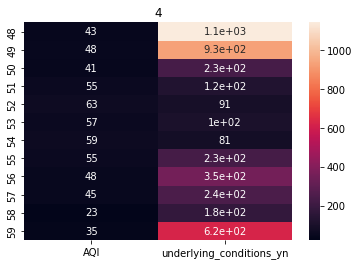

----------------------
----------------------


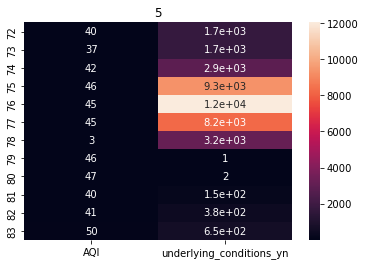

----------------------
----------------------


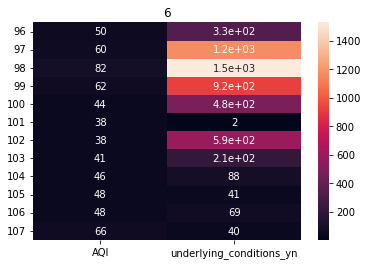

----------------------
----------------------


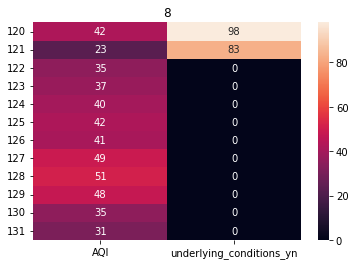

----------------------
----------------------


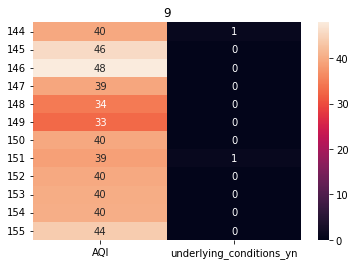

----------------------
----------------------


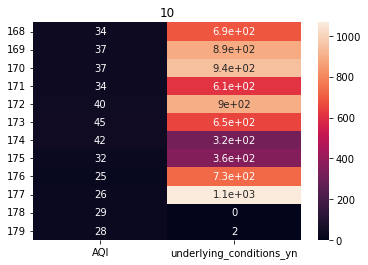

----------------------
----------------------


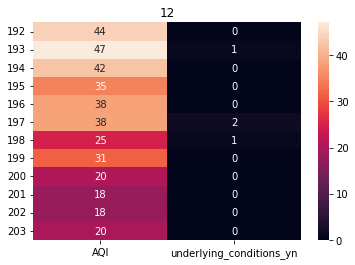

----------------------
----------------------


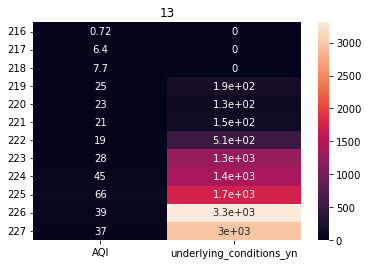

----------------------
----------------------


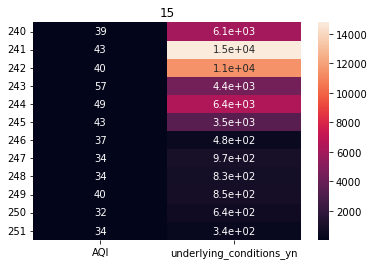

----------------------
----------------------


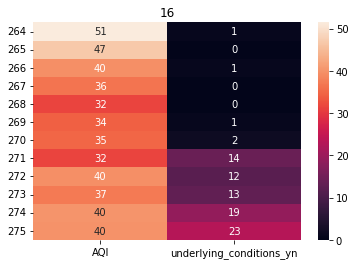

----------------------
----------------------


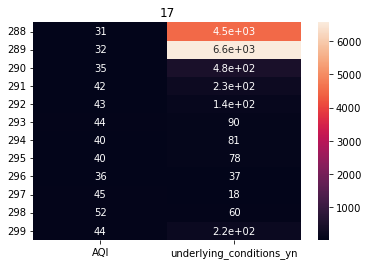

----------------------
----------------------


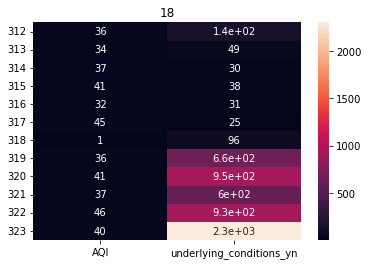

----------------------
----------------------


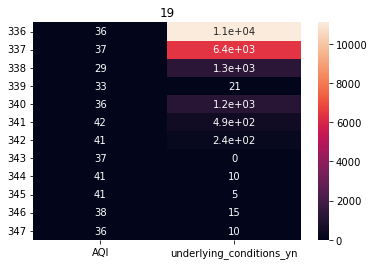

----------------------
----------------------


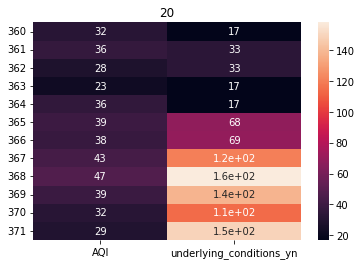

----------------------
----------------------


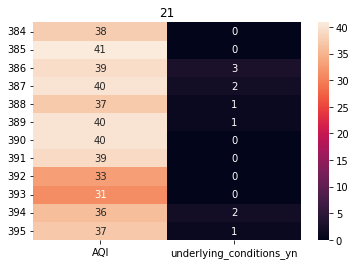

----------------------
----------------------


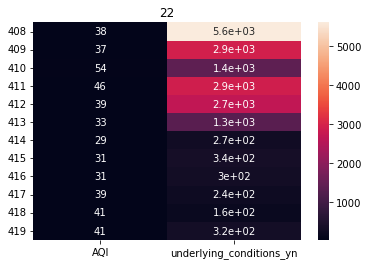

----------------------
----------------------


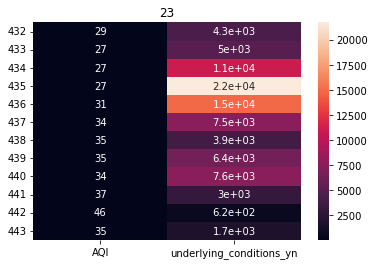

----------------------
----------------------


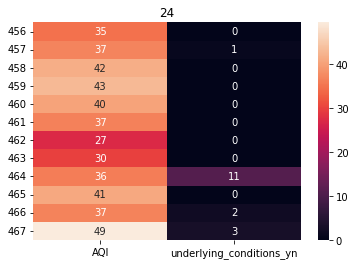

----------------------
----------------------


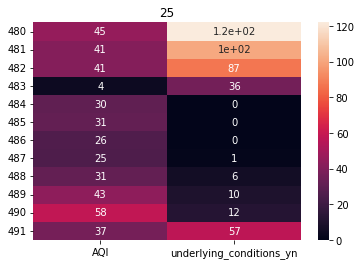

----------------------
----------------------


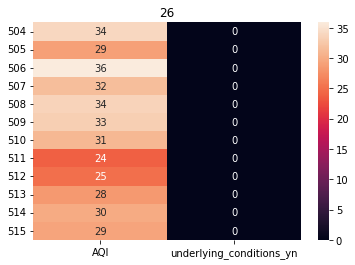

----------------------
----------------------


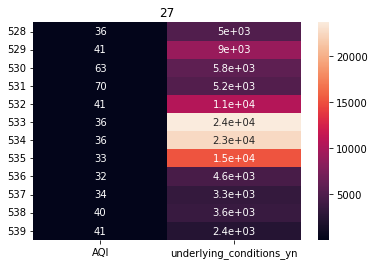

----------------------
----------------------


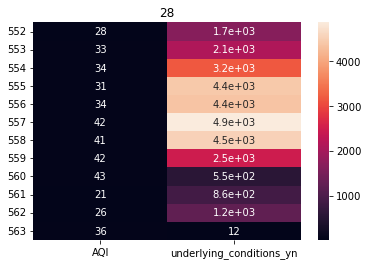

----------------------
----------------------


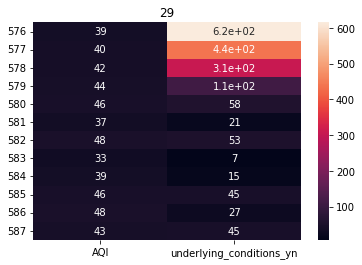

----------------------
----------------------


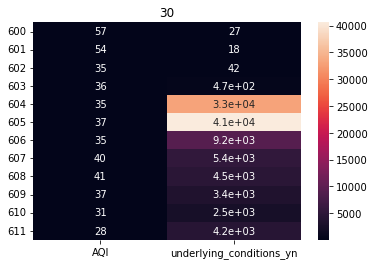

----------------------
----------------------


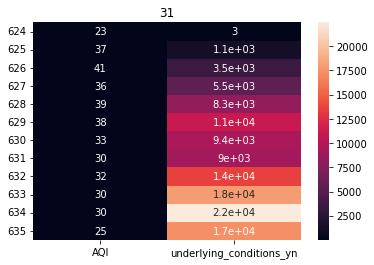

----------------------
----------------------


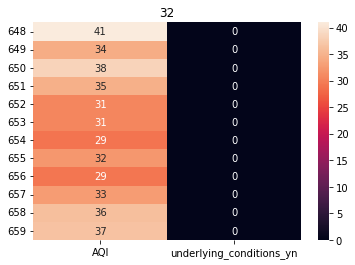

----------------------
----------------------


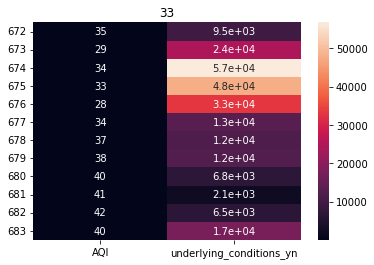

----------------------
----------------------


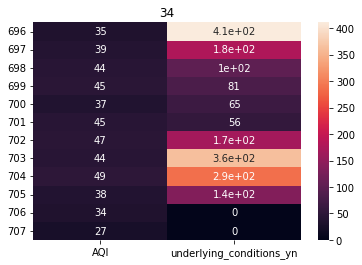

----------------------
----------------------


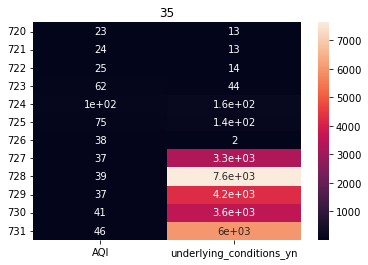

----------------------
----------------------


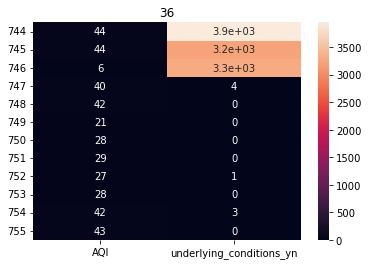

----------------------
----------------------


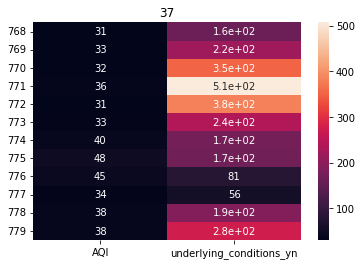

----------------------
----------------------


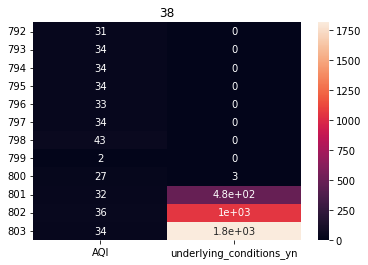

----------------------
----------------------


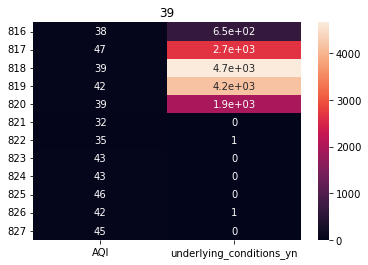

----------------------
----------------------


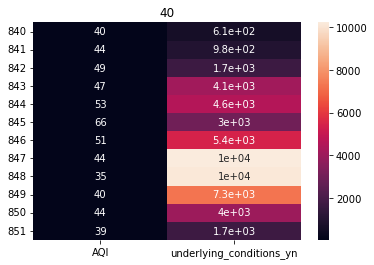

----------------------
----------------------


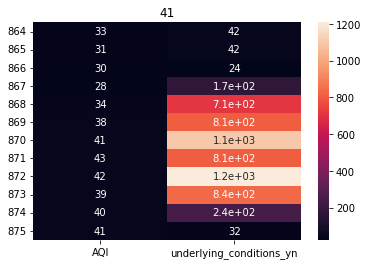

----------------------
----------------------


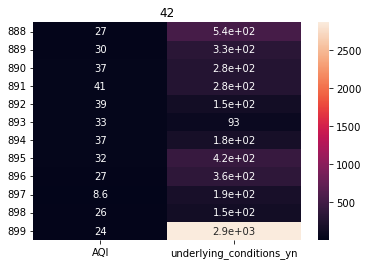

----------------------
----------------------


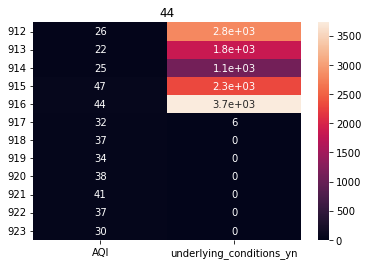

----------------------
----------------------


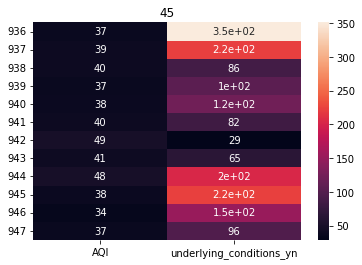

----------------------
----------------------


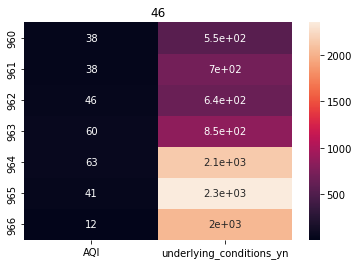

----------------------


In [68]:
##Generating Correlation Heat Map of AQI and Underlying_Conditions

i=0
j=24
for code in sc:
  
  df_plotter = pd.DataFrame()
  df_plotter=merged_df2.iloc[i:j,:]
  df_plotter = df_plotter.drop(['State_Name','year_month','State Code_x','ID','State Code_y','case_month','hosp_yn','death_yn'], axis=1)
  df_plotter_2020=pd.DataFrame()
  df_plotter_2019=pd.DataFrame()
  df_plotter_2019=df_plotter.iloc[:12,]
  df_plotter_2020=df_plotter.iloc[12:,]

  if not df_plotter.empty:
      try:
          ax = plt.axes()
          sns.heatmap(df_plotter_2019, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
          p2 = sns.heatmap(df_plotter_2020, annot=True, ax=ax)
          ax.set_title(code)
          plt.show()
          print('----------------------')
      except ValueError:
          print("Warning: zero-size array")


  i+=24
  j+=24


### After Analysing the Underlying conditions of the Dataframe: Underlying_Conditions states that the patient have one or more of the underlying medical conditions and risk behaviors: diabetes mellitus, hypertension, severe obesity (BMI>40), cardiovascular disease, chronic renal disease, chronic liver disease, chronic lung disease, other chronic diseases, immunosuppressive condition, autoimmune condition, current smoker, former smoker, substance abuse or misuse, disability, psychological/psychiatric, pregnancy, other.  Which is specified in terms of [Yes, No, Unknown]



### Based on the Above heat maps, the AQI has no correlation with the Underlying_Heatmaps.

## -----------------------------------------------------------------------------------------------------------

## Final Summary

<b>Confounding factors are variables that are associated with both the exposure and the outcome, and can therefore distort the relationship between the exposure and outcome. In this case according to the heat graph of Death
    and underlying conditions, they are not directly associated with AQI: Hence, they are not considered confounding factors in the relationship between AQI and death or underlying conditions. Confounding factors should be controlled for in order to accurately assess the relationship between the exposure and outcome.</b>